In [1]:
####### Question #######
'''
1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. 
Consider input image size to be 224x224x3. [2 points]

2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. 
Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned 
(eg, take pool size 2x2, filter size 3x3, and so on). [3 points]

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

3. Train the CNN model for E epoch (take E=50), save the train_loss, train_acc, validation_loss, 
validation_acc for each epoch and plot it after training has finished. [3 points]

4. Evaluate the trained CNN model on test data. Print classification results. [1 point]

5. Can you try to make changes in anyway in the CNN model and improve your test accuracy?
Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. 
Plot precision and recall for default and improved model in a single bar plot. [3 points]

'''


########Load Libraries#######

import cv2
import keras
from keras import backend as K 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from tqdm import tqdm
import os , sys
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import gmtime, strftime
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

####################################
#   Create Class and fetch Data    #
####################################

######## Assign Data ########

batch_size = 128
# All images will be rescaled by 1./255
datagen = ImageDataGenerator(rescale=1/255)
# Flow  images in batches of 128 using train_datagen generator
...
# load and iterate training dataset
train_it = datagen.flow_from_directory('archive\\train\\', class_mode='categorical', batch_size=batch_size)
# load and iterate validation dataset
val_it = datagen.flow_from_directory('archive\\valid\\', class_mode='categorical', batch_size=batch_size)
# load and iterate test dataset
test_it = datagen.flow_from_directory('archive\\test\\', class_mode='categorical', batch_size=batch_size)
test_trues = test_it.classes # Store ground truth
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
print(val_it.class_indices) #print class indices
print(test_trues)

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Batch shape=(128, 256, 256, 3), min=0.000, max=1.000
{'air hockey': 0, 'ampute football': 1, 'archery': 2, 'arm wrestling': 3, 'balance beam': 4, 'barell racing': 5, 'baseball': 6, 'basketball': 7, 'billiards': 8, 'bmx': 9, 'bobsled': 10, 'bowling': 11, 'boxing': 12, 'bull riding': 13, 'canoe slamon': 14, 'cricket': 15, 'croquet': 16, 'curling': 17, 'fencing': 18, 'field hockey': 19, 'figure skating men': 20, 'figure skating pairs': 21, 'figure skating women': 22, 'football': 23, 'formula 1 racing': 24, 'frisbee': 25, 'giant slalom': 26, 'golf': 27, 'hammer throw': 28, 'harness racing': 29, 'high jump': 30, 'hockey': 31, 'horse jumping': 32, 'horse racing': 33, 'hurdles': 34, 'ice climbing': 35, 'jai alai': 36, 'javelin': 37, 'judo': 38, 'lacrosse': 39, 'luge': 40, 'motorcycle racing': 41, 'nascar racing': 42, 'olympic wrestling': 43, 'parallel bar': 44, 'pole

In [3]:
##############################################################
#                   create the model                         #
##############################################################
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(2, 2), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(73, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 127008)           

Epoch 1/50
81/81 [==============================] - ETA: 7:00 - loss: 4.2962 - accuracy: 0.00 - ETA: 3:39 - loss: 9.6895 - accuracy: 0.01 - ETA: 2:32 - loss: 13.3102 - accuracy: 0.010 - ETA: 1:58 - loss: 14.5826 - accuracy: 0.011 - ETA: 1:37 - loss: 15.4452 - accuracy: 0.010 - ETA: 1:24 - loss: 15.4283 - accuracy: 0.013 - ETA: 1:14 - loss: 15.0641 - accuracy: 0.011 - ETA: 1:07 - loss: 14.7375 - accuracy: 0.010 - ETA: 1:01 - loss: 14.2076 - accuracy: 0.011 - ETA: 58s - loss: 13.6643 - accuracy: 0.012 - ETA: 56s - loss: 13.0491 - accuracy: 0.01 - ETA: 54s - loss: 12.5907 - accuracy: 0.01 - ETA: 56s - loss: 12.1190 - accuracy: 0.01 - ETA: 54s - loss: 11.7005 - accuracy: 0.01 - ETA: 53s - loss: 11.3099 - accuracy: 0.01 - ETA: 53s - loss: 10.9688 - accuracy: 0.01 - ETA: 52s - loss: 10.6128 - accuracy: 0.01 - ETA: 53s - loss: 10.2813 - accuracy: 0.01 - ETA: 51s - loss: 9.9917 - accuracy: 0.0148 - ETA: 49s - loss: 9.7224 - accuracy: 0.014 - ETA: 48s - loss: 9.4803 - accuracy: 0.015 - ETA: 46s

81/81 [==============================] - ETA: 21s - loss: 3.5762 - accuracy: 0.132 - ETA: 1:05 - loss: 3.5181 - accuracy: 0.13 - ETA: 58s - loss: 3.5625 - accuracy: 0.1198 - ETA: 54s - loss: 3.5029 - accuracy: 0.130 - ETA: 51s - loss: 3.4806 - accuracy: 0.131 - ETA: 49s - loss: 3.4794 - accuracy: 0.131 - ETA: 47s - loss: 3.4898 - accuracy: 0.130 - ETA: 46s - loss: 3.4705 - accuracy: 0.134 - ETA: 45s - loss: 3.4691 - accuracy: 0.133 - ETA: 44s - loss: 3.4586 - accuracy: 0.131 - ETA: 43s - loss: 3.4478 - accuracy: 0.134 - ETA: 42s - loss: 3.4400 - accuracy: 0.141 - ETA: 41s - loss: 3.4429 - accuracy: 0.140 - ETA: 40s - loss: 3.4524 - accuracy: 0.139 - ETA: 38s - loss: 3.4424 - accuracy: 0.139 - ETA: 37s - loss: 3.4342 - accuracy: 0.143 - ETA: 37s - loss: 3.4285 - accuracy: 0.143 - ETA: 36s - loss: 3.4276 - accuracy: 0.144 - ETA: 35s - loss: 3.4288 - accuracy: 0.146 - ETA: 34s - loss: 3.4263 - accuracy: 0.146 - ETA: 33s - loss: 3.4186 - accuracy: 0.147 - ETA: 32s - loss: 3.4131 - accuracy

81/81 [==============================] - ETA: 24s - loss: 2.7748 - accuracy: 0.234 - ETA: 24s - loss: 2.7272 - accuracy: 0.257 - ETA: 23s - loss: 2.7257 - accuracy: 0.268 - ETA: 28s - loss: 2.6539 - accuracy: 0.294 - ETA: 30s - loss: 2.6594 - accuracy: 0.300 - ETA: 30s - loss: 2.6523 - accuracy: 0.303 - ETA: 30s - loss: 2.6457 - accuracy: 0.302 - ETA: 29s - loss: 2.6066 - accuracy: 0.315 - ETA: 29s - loss: 2.5962 - accuracy: 0.317 - ETA: 28s - loss: 2.6008 - accuracy: 0.313 - ETA: 27s - loss: 2.6069 - accuracy: 0.315 - ETA: 27s - loss: 2.6022 - accuracy: 0.315 - ETA: 26s - loss: 2.5778 - accuracy: 0.323 - ETA: 26s - loss: 2.5627 - accuracy: 0.326 - ETA: 25s - loss: 2.5601 - accuracy: 0.328 - ETA: 25s - loss: 2.5783 - accuracy: 0.328 - ETA: 24s - loss: 2.5594 - accuracy: 0.331 - ETA: 24s - loss: 2.5475 - accuracy: 0.333 - ETA: 23s - loss: 2.5452 - accuracy: 0.333 - ETA: 23s - loss: 2.5392 - accuracy: 0.336 - ETA: 23s - loss: 2.5458 - accuracy: 0.336 - ETA: 23s - loss: 2.5267 - accuracy:

81/81 [==============================] - ETA: 26s - loss: 2.4040 - accuracy: 0.335 - ETA: 25s - loss: 2.1999 - accuracy: 0.410 - ETA: 38s - loss: 2.2088 - accuracy: 0.401 - ETA: 45s - loss: 2.2257 - accuracy: 0.384 - ETA: 46s - loss: 2.2399 - accuracy: 0.379 - ETA: 48s - loss: 2.2032 - accuracy: 0.389 - ETA: 46s - loss: 2.1417 - accuracy: 0.408 - ETA: 46s - loss: 2.1152 - accuracy: 0.419 - ETA: 44s - loss: 2.0804 - accuracy: 0.428 - ETA: 43s - loss: 2.0658 - accuracy: 0.435 - ETA: 43s - loss: 2.0470 - accuracy: 0.438 - ETA: 42s - loss: 2.0309 - accuracy: 0.446 - ETA: 40s - loss: 2.0208 - accuracy: 0.450 - ETA: 39s - loss: 2.0037 - accuracy: 0.459 - ETA: 37s - loss: 1.9758 - accuracy: 0.469 - ETA: 37s - loss: 1.9590 - accuracy: 0.473 - ETA: 36s - loss: 1.9559 - accuracy: 0.473 - ETA: 35s - loss: 1.9434 - accuracy: 0.475 - ETA: 33s - loss: 1.9239 - accuracy: 0.478 - ETA: 33s - loss: 1.9156 - accuracy: 0.482 - ETA: 32s - loss: 1.9120 - accuracy: 0.484 - ETA: 31s - loss: 1.8905 - accuracy:

81/81 [==============================] - ETA: 26s - loss: 1.3094 - accuracy: 0.632 - ETA: 25s - loss: 1.3380 - accuracy: 0.632 - ETA: 25s - loss: 1.3173 - accuracy: 0.643 - ETA: 25s - loss: 1.3533 - accuracy: 0.636 - ETA: 24s - loss: 1.3783 - accuracy: 0.626 - ETA: 24s - loss: 1.3576 - accuracy: 0.626 - ETA: 24s - loss: 1.3574 - accuracy: 0.626 - ETA: 23s - loss: 1.3627 - accuracy: 0.631 - ETA: 24s - loss: 1.3324 - accuracy: 0.638 - ETA: 25s - loss: 1.3191 - accuracy: 0.640 - ETA: 26s - loss: 1.2875 - accuracy: 0.651 - ETA: 27s - loss: 1.2709 - accuracy: 0.655 - ETA: 27s - loss: 1.2479 - accuracy: 0.667 - ETA: 28s - loss: 1.2334 - accuracy: 0.669 - ETA: 28s - loss: 1.2134 - accuracy: 0.678 - ETA: 28s - loss: 1.2020 - accuracy: 0.680 - ETA: 27s - loss: 1.1906 - accuracy: 0.682 - ETA: 27s - loss: 1.1784 - accuracy: 0.685 - ETA: 27s - loss: 1.1572 - accuracy: 0.691 - ETA: 26s - loss: 1.1480 - accuracy: 0.692 - ETA: 26s - loss: 1.1369 - accuracy: 0.697 - ETA: 26s - loss: 1.1279 - accuracy:

81/81 [==============================] - ETA: 26s - loss: 0.6574 - accuracy: 0.781 - ETA: 26s - loss: 0.7055 - accuracy: 0.781 - ETA: 26s - loss: 0.6421 - accuracy: 0.809 - ETA: 30s - loss: 0.6927 - accuracy: 0.804 - ETA: 33s - loss: 0.6835 - accuracy: 0.798 - ETA: 34s - loss: 0.7052 - accuracy: 0.794 - ETA: 35s - loss: 0.7120 - accuracy: 0.794 - ETA: 37s - loss: 0.7114 - accuracy: 0.796 - ETA: 37s - loss: 0.7159 - accuracy: 0.794 - ETA: 37s - loss: 0.7287 - accuracy: 0.792 - ETA: 38s - loss: 0.7070 - accuracy: 0.800 - ETA: 38s - loss: 0.6992 - accuracy: 0.801 - ETA: 37s - loss: 0.6943 - accuracy: 0.803 - ETA: 37s - loss: 0.6849 - accuracy: 0.808 - ETA: 36s - loss: 0.6741 - accuracy: 0.812 - ETA: 35s - loss: 0.6597 - accuracy: 0.815 - ETA: 35s - loss: 0.6480 - accuracy: 0.819 - ETA: 34s - loss: 0.6336 - accuracy: 0.826 - ETA: 34s - loss: 0.6213 - accuracy: 0.830 - ETA: 33s - loss: 0.6109 - accuracy: 0.835 - ETA: 33s - loss: 0.6086 - accuracy: 0.837 - ETA: 32s - loss: 0.6095 - accuracy:

81/81 [==============================] - ETA: 32s - loss: 0.3859 - accuracy: 0.898 - ETA: 31s - loss: 0.3046 - accuracy: 0.929 - ETA: 30s - loss: 0.3342 - accuracy: 0.919 - ETA: 29s - loss: 0.3278 - accuracy: 0.918 - ETA: 29s - loss: 0.3387 - accuracy: 0.914 - ETA: 29s - loss: 0.3374 - accuracy: 0.912 - ETA: 28s - loss: 0.3310 - accuracy: 0.918 - ETA: 28s - loss: 0.3374 - accuracy: 0.916 - ETA: 27s - loss: 0.3581 - accuracy: 0.907 - ETA: 27s - loss: 0.3512 - accuracy: 0.907 - ETA: 27s - loss: 0.3435 - accuracy: 0.909 - ETA: 25s - loss: 0.3350 - accuracy: 0.910 - ETA: 26s - loss: 0.3321 - accuracy: 0.912 - ETA: 26s - loss: 0.3280 - accuracy: 0.913 - ETA: 25s - loss: 0.3237 - accuracy: 0.913 - ETA: 25s - loss: 0.3196 - accuracy: 0.915 - ETA: 25s - loss: 0.3207 - accuracy: 0.917 - ETA: 25s - loss: 0.3181 - accuracy: 0.917 - ETA: 24s - loss: 0.3162 - accuracy: 0.917 - ETA: 24s - loss: 0.3096 - accuracy: 0.919 - ETA: 23s - loss: 0.3062 - accuracy: 0.919 - ETA: 23s - loss: 0.3026 - accuracy:

81/81 [==============================] - ETA: 1:14 - loss: 0.1781 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1898 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1849 - accuracy: 0.94 - ETA: 1:12 - loss: 0.1912 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1839 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1761 - accuracy: 0.95 - ETA: 1:09 - loss: 0.1858 - accuracy: 0.95 - ETA: 1:08 - loss: 0.1890 - accuracy: 0.94 - ETA: 1:07 - loss: 0.1861 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1817 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1789 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1765 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1746 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1746 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1707 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1674 - accuracy: 0.95 - ETA: 59s - loss: 0.1633 - accuracy: 0.9614 - ETA: 58s - loss: 0.1599 - accuracy: 0.962 - ETA: 58s - loss: 0.1549 - accuracy: 0.964 - ETA: 57s - loss: 0.1515 - accuracy: 0.966 - ETA: 56s - loss: 0.1502 - accuracy: 0.966 - ETA: 55s - loss: 0.1488 - accuracy

81/81 [==============================] - ETA: 1:16 - loss: 0.0880 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0885 - accuracy: 0.97 - ETA: 1:14 - loss: 0.1055 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1055 - accuracy: 0.96 - ETA: 1:12 - loss: 0.0957 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0919 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0939 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0961 - accuracy: 0.97 - ETA: 1:04 - loss: 0.1025 - accuracy: 0.97 - ETA: 1:04 - loss: 0.1071 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1100 - accuracy: 0.97 - ETA: 1:03 - loss: 0.1132 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1121 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1179 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1210 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1243 - accuracy: 0.96 - ETA: 59s - loss: 0.1221 - accuracy: 0.9671 - ETA: 58s - loss: 0.1224 - accuracy: 0.967 - ETA: 57s - loss: 0.1183 - accuracy: 0.969 - ETA: 56s - loss: 0.1173 - accuracy: 0.969 - ETA: 55s - loss: 0.1147 - accuracy: 0.970 - ETA: 55s - loss: 0.1145 - accuracy

81/81 [==============================] - ETA: 1:15 - loss: 0.0563 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0550 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0682 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0966 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0932 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0937 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0926 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0871 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0807 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0790 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0819 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0800 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0782 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0791 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0778 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0745 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0739 - accuracy: 0.98 - ETA: 59s - loss: 0.0736 - accuracy: 0.9852 - ETA: 58s - loss: 0.0719 - accuracy: 0.985 - ETA: 57s - loss: 0.0715 - accuracy: 0.985 - ETA: 56s - loss: 0.0702 - accuracy: 0.985 - ETA: 55s - loss: 0.0686 - accuracy

81/81 [==============================] - ETA: 33s - loss: 0.0316 - accuracy: 1.000 - ETA: 33s - loss: 0.0298 - accuracy: 1.000 - ETA: 32s - loss: 0.0389 - accuracy: 0.994 - ETA: 32s - loss: 0.0503 - accuracy: 0.992 - ETA: 31s - loss: 0.0515 - accuracy: 0.989 - ETA: 31s - loss: 0.0518 - accuracy: 0.989 - ETA: 31s - loss: 0.0502 - accuracy: 0.991 - ETA: 31s - loss: 0.0537 - accuracy: 0.987 - ETA: 32s - loss: 0.0672 - accuracy: 0.987 - ETA: 31s - loss: 0.0731 - accuracy: 0.985 - ETA: 30s - loss: 0.0703 - accuracy: 0.985 - ETA: 30s - loss: 0.0683 - accuracy: 0.986 - ETA: 30s - loss: 0.0654 - accuracy: 0.987 - ETA: 29s - loss: 0.0645 - accuracy: 0.987 - ETA: 29s - loss: 0.0657 - accuracy: 0.986 - ETA: 28s - loss: 0.0661 - accuracy: 0.986 - ETA: 28s - loss: 0.0645 - accuracy: 0.987 - ETA: 28s - loss: 0.0647 - accuracy: 0.987 - ETA: 27s - loss: 0.0636 - accuracy: 0.987 - ETA: 27s - loss: 0.0628 - accuracy: 0.987 - ETA: 27s - loss: 0.0612 - accuracy: 0.988 - ETA: 26s - loss: 0.0603 - accuracy:

81/81 [==============================] - ETA: 1:14 - loss: 0.0371 - accuracy: 1.00 - ETA: 1:13 - loss: 0.0518 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0588 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0523 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0577 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0548 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0503 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0533 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0513 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0480 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0477 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0492 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0495 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0491 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0487 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0478 - accuracy: 0.99 - ETA: 59s - loss: 0.0464 - accuracy: 0.9908 - ETA: 59s - loss: 0.0472 - accuracy: 0.990 - ETA: 58s - loss: 0.0550 - accuracy: 0.988 - ETA: 57s - loss: 0.0549 - accuracy: 0.988 - ETA: 56s - loss: 0.0541 - accuracy: 0.989 - ETA: 55s - loss: 0.0549 - accuracy

81/81 [==============================] - ETA: 30s - loss: 0.0599 - accuracy: 0.992 - ETA: 30s - loss: 0.0894 - accuracy: 0.980 - ETA: 30s - loss: 0.0750 - accuracy: 0.984 - ETA: 26s - loss: 0.0587 - accuracy: 0.986 - ETA: 27s - loss: 0.0505 - accuracy: 0.989 - ETA: 27s - loss: 0.0473 - accuracy: 0.989 - ETA: 27s - loss: 0.0430 - accuracy: 0.991 - ETA: 27s - loss: 0.0511 - accuracy: 0.986 - ETA: 27s - loss: 0.0551 - accuracy: 0.986 - ETA: 27s - loss: 0.0514 - accuracy: 0.987 - ETA: 26s - loss: 0.0506 - accuracy: 0.988 - ETA: 26s - loss: 0.0491 - accuracy: 0.988 - ETA: 26s - loss: 0.0490 - accuracy: 0.988 - ETA: 25s - loss: 0.0490 - accuracy: 0.988 - ETA: 25s - loss: 0.0526 - accuracy: 0.987 - ETA: 24s - loss: 0.0525 - accuracy: 0.987 - ETA: 25s - loss: 0.0517 - accuracy: 0.988 - ETA: 24s - loss: 0.0518 - accuracy: 0.987 - ETA: 24s - loss: 0.0512 - accuracy: 0.988 - ETA: 24s - loss: 0.0529 - accuracy: 0.987 - ETA: 23s - loss: 0.0525 - accuracy: 0.987 - ETA: 23s - loss: 0.0517 - accuracy:

81/81 [==============================] - ETA: 1:14 - loss: 0.0745 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0829 - accuracy: 0.96 - ETA: 1:13 - loss: 0.0768 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:11 - loss: 0.0745 - accuracy: 0.97 - ETA: 1:10 - loss: 0.0877 - accuracy: 0.97 - ETA: 1:09 - loss: 0.0794 - accuracy: 0.97 - ETA: 1:08 - loss: 0.0795 - accuracy: 0.97 - ETA: 1:07 - loss: 0.0767 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0788 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0810 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0785 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0782 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0769 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0780 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0802 - accuracy: 0.97 - ETA: 59s - loss: 0.0813 - accuracy: 0.9789 - ETA: 57s - loss: 0.0800 - accuracy: 0.979 - ETA: 56s - loss: 0.0780 - accuracy: 0.980 - ETA: 55s - loss: 0.0787 - accuracy: 0.979 - ETA: 54s - loss: 0.0827 - accuracy: 0.978 - ETA: 53s - loss: 0.0827 - accuracy

81/81 [==============================] - ETA: 1:14 - loss: 0.0779 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0502 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0473 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0459 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0400 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0433 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0429 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0400 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0430 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0419 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0463 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0483 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0488 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0497 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0487 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0468 - accuracy: 0.98 - ETA: 59s - loss: 0.0474 - accuracy: 0.9887 - ETA: 58s - loss: 0.0463 - accuracy: 0.988 - ETA: 57s - loss: 0.0451 - accuracy: 0.989 - ETA: 55s - loss: 0.0457 - accuracy: 0.989 - ETA: 54s - loss: 0.0474 - accuracy

81/81 [==============================] - ETA: 1:19 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0552 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0399 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0365 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0348 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0325 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0370 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0420 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0398 - accuracy: 0.98 - ETA: 58s - loss: 0.0411 - accuracy: 0.9867 - ETA: 55s - loss: 0.0427 - accuracy: 0.986 - ETA: 52s - loss: 0.0413 - accuracy: 0.987 - ETA: 50s - loss: 0.0411 - accuracy: 0.987 - ETA: 47s - loss: 0.0428 - accuracy: 0.986 - ETA: 45s - loss: 0.0409 - accuracy: 0.987 - ETA: 44s - loss: 0.0420 - accuracy: 0.986 - ETA: 42s - loss: 0.0424 - accuracy: 0.986 - ETA: 41s - loss: 0.0423 - accuracy: 0.986 - ETA: 39s - loss: 0.0418 - accuracy: 0.986 - ETA: 38s - loss: 0.0414 - accuracy: 0.987 - ETA: 37s - loss: 0.0414 - accuracy: 0.987 - ETA: 35s - loss: 0.0423 - accuracy

81/81 [==============================] - ETA: 1:14 - loss: 0.0284 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0322 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0242 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0254 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0437 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0462 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0425 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0384 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0371 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0348 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0338 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0402 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0396 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0405 - accuracy: 0.98 - ETA: 59s - loss: 0.0396 - accuracy: 0.9886 - ETA: 58s - loss: 0.0393 - accuracy: 0.987 - ETA: 58s - loss: 0.0384 - accuracy: 0.987 - ETA: 57s - loss: 0.0374 - accuracy: 0.987 - ETA: 56s - loss: 0.0394 - accuracy: 0.987 - ETA: 55s - loss: 0.0409 - accuracy: 0.987 - ETA: 54s - loss: 0.0400 - accuracy: 0.987 - ETA: 53s - loss: 0.0417 - accuracy

81/81 [==============================] - ETA: 1:14 - loss: 0.1229 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0748 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0560 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0468 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0486 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0494 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0560 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0667 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0624 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0591 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0587 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0638 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0702 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0691 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0746 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0778 - accuracy: 0.97 - ETA: 59s - loss: 0.0768 - accuracy: 0.9793 - ETA: 58s - loss: 0.0749 - accuracy: 0.980 - ETA: 57s - loss: 0.0793 - accuracy: 0.977 - ETA: 56s - loss: 0.0799 - accuracy: 0.977 - ETA: 55s - loss: 0.0786 - accuracy: 0.978 - ETA: 55s - loss: 0.0825 - accuracy

81/81 [==============================] - ETA: 1:23 - loss: 0.0215 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0224 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0311 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0254 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0254 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0230 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0236 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0238 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0244 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0311 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0302 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0304 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0330 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0332 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0327 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0343 - accuracy: 0.98 - ETA: 1:01 - loss: 0.0331 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0331 - accuracy: 0.99 - ETA: 59s - loss: 0.0320 - accuracy: 0.9910 - ETA: 58s - loss: 0.0326 - accuracy: 0.990 - ETA: 57s - loss: 0.0319 - accuracy: 0.991 - ETA: 56s - loss: 0.0308 - accuracy

81/81 [==============================] - ETA: 33s - loss: 0.0195 - accuracy: 1.000 - ETA: 31s - loss: 0.0240 - accuracy: 0.996 - ETA: 30s - loss: 0.0269 - accuracy: 0.994 - ETA: 30s - loss: 0.0345 - accuracy: 0.992 - ETA: 29s - loss: 0.0495 - accuracy: 0.989 - ETA: 29s - loss: 0.0437 - accuracy: 0.990 - ETA: 26s - loss: 0.0441 - accuracy: 0.990 - ETA: 27s - loss: 0.0423 - accuracy: 0.991 - ETA: 27s - loss: 0.0416 - accuracy: 0.990 - ETA: 26s - loss: 0.0441 - accuracy: 0.988 - ETA: 26s - loss: 0.0425 - accuracy: 0.988 - ETA: 26s - loss: 0.0423 - accuracy: 0.988 - ETA: 25s - loss: 0.0424 - accuracy: 0.988 - ETA: 25s - loss: 0.0435 - accuracy: 0.988 - ETA: 25s - loss: 0.0453 - accuracy: 0.987 - ETA: 24s - loss: 0.0442 - accuracy: 0.987 - ETA: 24s - loss: 0.0452 - accuracy: 0.987 - ETA: 24s - loss: 0.0448 - accuracy: 0.987 - ETA: 23s - loss: 0.0456 - accuracy: 0.987 - ETA: 23s - loss: 0.0462 - accuracy: 0.986 - ETA: 23s - loss: 0.0446 - accuracy: 0.987 - ETA: 22s - loss: 0.0453 - accuracy:

81/81 [==============================] - ETA: 1:14 - loss: 0.0576 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0474 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0464 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0479 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0465 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0407 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0372 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0337 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0309 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0291 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0290 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0329 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0329 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0319 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0306 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0360 - accuracy: 0.99 - ETA: 59s - loss: 0.0345 - accuracy: 0.9922 - ETA: 58s - loss: 0.0332 - accuracy: 0.992 - ETA: 57s - loss: 0.0334 - accuracy: 0.992 - ETA: 56s - loss: 0.0323 - accuracy: 0.993 - ETA: 55s - loss: 0.0323 - accuracy: 0.992 - ETA: 54s - loss: 0.0313 - accuracy

81/81 [==============================] - ETA: 1:14 - loss: 0.0273 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0160 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0219 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0186 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0196 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0255 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0259 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0265 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0247 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0260 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0262 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0261 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0253 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0244 - accuracy: 0.99 - ETA: 58s - loss: 0.0233 - accuracy: 0.9934 - ETA: 57s - loss: 0.0226 - accuracy: 0.993 - ETA: 57s - loss: 0.0226 - accuracy: 0.993 - ETA: 56s - loss: 0.0230 - accuracy: 0.993 - ETA: 55s - loss: 0.0234 - accuracy: 0.993 - ETA: 54s - loss: 0.0230 - accuracy: 0.993 - ETA: 53s - loss: 0.0241 - accuracy

81/81 [==============================] - ETA: 1:16 - loss: 0.0052 - accuracy: 1.00 - ETA: 1:14 - loss: 0.0099 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0118 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0094 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0137 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0182 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0169 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0170 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0165 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0190 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0181 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0172 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0162 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0175 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0180 - accuracy: 0.99 - ETA: 58s - loss: 0.0177 - accuracy: 0.9939 - ETA: 55s - loss: 0.0172 - accuracy: 0.994 - ETA: 53s - loss: 0.0198 - accuracy: 0.993 - ETA: 51s - loss: 0.0227 - accuracy: 0.993 - ETA: 49s - loss: 0.0229 - accuracy: 0.993 - ETA: 47s - loss: 0.0228 - accuracy: 0.993 - ETA: 45s - loss: 0.0223 - accuracy

81/81 [==============================] - ETA: 29s - loss: 0.0031 - accuracy: 1.000 - ETA: 29s - loss: 0.0413 - accuracy: 0.992 - ETA: 29s - loss: 0.0360 - accuracy: 0.989 - ETA: 29s - loss: 0.0290 - accuracy: 0.992 - ETA: 29s - loss: 0.0332 - accuracy: 0.992 - ETA: 28s - loss: 0.0292 - accuracy: 0.993 - ETA: 28s - loss: 0.0264 - accuracy: 0.994 - ETA: 27s - loss: 0.0240 - accuracy: 0.995 - ETA: 27s - loss: 0.0222 - accuracy: 0.995 - ETA: 27s - loss: 0.0208 - accuracy: 0.996 - ETA: 26s - loss: 0.0251 - accuracy: 0.995 - ETA: 26s - loss: 0.0245 - accuracy: 0.995 - ETA: 25s - loss: 0.0238 - accuracy: 0.995 - ETA: 24s - loss: 0.0223 - accuracy: 0.995 - ETA: 24s - loss: 0.0219 - accuracy: 0.995 - ETA: 24s - loss: 0.0211 - accuracy: 0.995 - ETA: 23s - loss: 0.0205 - accuracy: 0.995 - ETA: 23s - loss: 0.0201 - accuracy: 0.995 - ETA: 23s - loss: 0.0203 - accuracy: 0.995 - ETA: 22s - loss: 0.0202 - accuracy: 0.995 - ETA: 22s - loss: 0.0213 - accuracy: 0.995 - ETA: 22s - loss: 0.0217 - accuracy:

81/81 [==============================] - ETA: 1:16 - loss: 0.0328 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0309 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0271 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0303 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0298 - accuracy: 0.99 - ETA: 1:12 - loss: 0.0344 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0321 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0291 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0327 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0314 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0293 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0312 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0294 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0286 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0291 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0340 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0334 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0332 - accuracy: 0.99 - ETA: 59s - loss: 0.0324 - accuracy: 0.9930 - ETA: 58s - loss: 0.0327 - accuracy: 0.993 - ETA: 57s - loss: 0.0314 - accuracy: 0.993 - ETA: 56s - loss: 0.0304 - accuracy

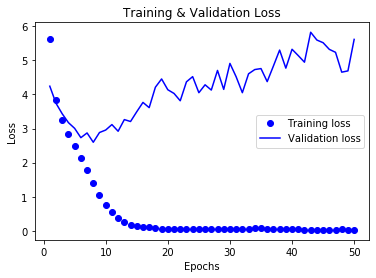

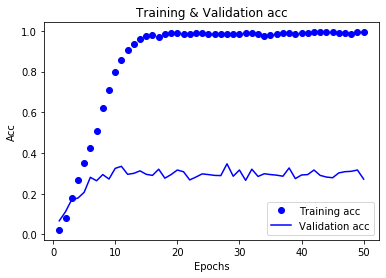

In [4]:
#######################Train Model#############################

# fit model
history = model.fit_generator(train_it,  steps_per_epoch=int(10416/batch_size), validation_data=val_it, validation_steps=4,epochs = 50
                             ,verbose=1)


plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [5]:
# evaluate model
test_loss , test_acc = model.evaluate_generator(test_it, steps=3)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

pred=model.predict_generator(test_it,steps=3,verbose=1)
test_trues = test_it.classes # Store ground truth
predicted_class_indices=np.argmax(pred,axis=1) #Capture predicted class indices

#labels = test_it.class_indices.keys()
#precisions, recall, f1_score, _ = precision_recall_fscore_support(test_trues, predicted_class_indices)
precision_default = precision_score(test_trues, predicted_class_indices, average="macro")
recall_default = recall_score(test_trues, predicted_class_indices, average="macro")
print("Precision:{} , recall:{},f1 score:{}".format(precision_score(test_trues, predicted_class_indices, average="macro"), recall_score(test_trues, predicted_class_indices, average="macro"), f1_score(test_trues, predicted_class_indices, average="macro")))

Test loss: 5.899463176727295 Test Acc: 0.31780821084976196
3/3 [==============================] - ETA:  - ETA:  - 2s 595ms/step


C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:0.025597119775201967 , recall:0.0136986301369863,f1 score:0.014600315970178985


In [6]:
####################### Create New Model ###########################

##############################################################
#                   create the model                         #
##############################################################
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
#model2.add(Dense(512, activation='relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(73, activation='softmax'))

model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 16)      1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 16)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 57, 57, 64)       

Epoch 1/50
81/81 [==============================] - ETA: 8:27 - loss: 4.2993 - accuracy: 0.02 - ETA: 4:51 - loss: 4.4342 - accuracy: 0.01 - ETA: 3:37 - loss: 4.3867 - accuracy: 0.00 - ETA: 3:00 - loss: 4.3636 - accuracy: 0.00 - ETA: 2:38 - loss: 4.3499 - accuracy: 0.00 - ETA: 2:23 - loss: 4.3393 - accuracy: 0.00 - ETA: 2:11 - loss: 4.3325 - accuracy: 0.00 - ETA: 2:03 - loss: 4.3265 - accuracy: 0.00 - ETA: 1:56 - loss: 4.3229 - accuracy: 0.00 - ETA: 1:51 - loss: 4.3201 - accuracy: 0.00 - ETA: 1:46 - loss: 4.3172 - accuracy: 0.00 - ETA: 1:42 - loss: 4.3149 - accuracy: 0.00 - ETA: 1:38 - loss: 4.3126 - accuracy: 0.00 - ETA: 1:34 - loss: 4.3105 - accuracy: 0.00 - ETA: 1:31 - loss: 4.3091 - accuracy: 0.00 - ETA: 1:28 - loss: 4.3070 - accuracy: 0.00 - ETA: 1:25 - loss: 4.3064 - accuracy: 0.00 - ETA: 1:23 - loss: 4.3036 - accuracy: 0.01 - ETA: 1:20 - loss: 4.3030 - accuracy: 0.01 - ETA: 1:18 - loss: 4.3015 - accuracy: 0.01 - ETA: 1:16 - loss: 4.3016 - accuracy: 0.01 - ETA: 1:14 - loss: 4.3001

81/81 [==============================] - ETA: 1:20 - loss: 3.4740 - accuracy: 0.19 - ETA: 1:19 - loss: 3.4750 - accuracy: 0.14 - ETA: 1:18 - loss: 3.4874 - accuracy: 0.13 - ETA: 1:17 - loss: 3.5077 - accuracy: 0.12 - ETA: 1:16 - loss: 3.4865 - accuracy: 0.12 - ETA: 1:15 - loss: 3.4729 - accuracy: 0.12 - ETA: 1:14 - loss: 3.4772 - accuracy: 0.12 - ETA: 1:13 - loss: 3.4874 - accuracy: 0.11 - ETA: 1:12 - loss: 3.4831 - accuracy: 0.11 - ETA: 1:11 - loss: 3.5103 - accuracy: 0.11 - ETA: 1:10 - loss: 3.5089 - accuracy: 0.11 - ETA: 1:09 - loss: 3.5098 - accuracy: 0.11 - ETA: 1:08 - loss: 3.5155 - accuracy: 0.11 - ETA: 1:07 - loss: 3.5111 - accuracy: 0.11 - ETA: 1:06 - loss: 3.4977 - accuracy: 0.11 - ETA: 1:05 - loss: 3.4968 - accuracy: 0.11 - ETA: 1:04 - loss: 3.5080 - accuracy: 0.11 - ETA: 1:03 - loss: 3.5064 - accuracy: 0.11 - ETA: 1:02 - loss: 3.5028 - accuracy: 0.11 - ETA: 1:01 - loss: 3.5095 - accuracy: 0.11 - ETA: 1:00 - loss: 3.5038 - accuracy: 0.11 - ETA: 59s - loss: 3.4954 - accuracy:

81/81 [==============================] - ETA: 55s - loss: 2.8226 - accuracy: 0.242 - ETA: 54s - loss: 2.7325 - accuracy: 0.293 - ETA: 54s - loss: 2.7807 - accuracy: 0.281 - ETA: 53s - loss: 2.8309 - accuracy: 0.269 - ETA: 54s - loss: 2.7971 - accuracy: 0.270 - ETA: 53s - loss: 2.7959 - accuracy: 0.266 - ETA: 52s - loss: 2.7854 - accuracy: 0.267 - ETA: 52s - loss: 2.7728 - accuracy: 0.268 - ETA: 51s - loss: 2.7513 - accuracy: 0.272 - ETA: 50s - loss: 2.7458 - accuracy: 0.273 - ETA: 49s - loss: 2.7694 - accuracy: 0.271 - ETA: 49s - loss: 2.7550 - accuracy: 0.277 - ETA: 48s - loss: 2.7385 - accuracy: 0.281 - ETA: 47s - loss: 2.7272 - accuracy: 0.282 - ETA: 47s - loss: 2.7253 - accuracy: 0.287 - ETA: 46s - loss: 2.7101 - accuracy: 0.292 - ETA: 45s - loss: 2.6890 - accuracy: 0.296 - ETA: 44s - loss: 2.6739 - accuracy: 0.301 - ETA: 44s - loss: 2.6740 - accuracy: 0.301 - ETA: 43s - loss: 2.6650 - accuracy: 0.299 - ETA: 42s - loss: 2.6652 - accuracy: 0.298 - ETA: 41s - loss: 2.6648 - accuracy:

81/81 [==============================] - ETA: 1:21 - loss: 2.2654 - accuracy: 0.42 - ETA: 1:19 - loss: 2.3085 - accuracy: 0.38 - ETA: 1:19 - loss: 2.3132 - accuracy: 0.39 - ETA: 1:18 - loss: 2.2787 - accuracy: 0.40 - ETA: 1:17 - loss: 2.2904 - accuracy: 0.39 - ETA: 1:16 - loss: 2.2933 - accuracy: 0.39 - ETA: 1:15 - loss: 2.2542 - accuracy: 0.40 - ETA: 1:14 - loss: 2.1881 - accuracy: 0.41 - ETA: 1:13 - loss: 2.1586 - accuracy: 0.42 - ETA: 1:12 - loss: 2.1273 - accuracy: 0.43 - ETA: 1:11 - loss: 2.1062 - accuracy: 0.44 - ETA: 1:10 - loss: 2.1082 - accuracy: 0.44 - ETA: 1:09 - loss: 2.0956 - accuracy: 0.44 - ETA: 1:08 - loss: 2.0972 - accuracy: 0.44 - ETA: 1:07 - loss: 2.0770 - accuracy: 0.44 - ETA: 1:06 - loss: 2.0673 - accuracy: 0.44 - ETA: 1:05 - loss: 2.0708 - accuracy: 0.44 - ETA: 1:04 - loss: 2.0670 - accuracy: 0.44 - ETA: 1:03 - loss: 2.0647 - accuracy: 0.44 - ETA: 1:02 - loss: 2.0571 - accuracy: 0.44 - ETA: 1:01 - loss: 2.0425 - accuracy: 0.45 - ETA: 1:00 - loss: 2.0439 - accuracy

81/81 [==============================] - ETA: 1:20 - loss: 1.6064 - accuracy: 0.53 - ETA: 1:19 - loss: 1.6617 - accuracy: 0.51 - ETA: 1:18 - loss: 1.6858 - accuracy: 0.51 - ETA: 1:17 - loss: 1.6774 - accuracy: 0.52 - ETA: 1:16 - loss: 1.6486 - accuracy: 0.53 - ETA: 1:15 - loss: 1.7035 - accuracy: 0.52 - ETA: 1:14 - loss: 1.6923 - accuracy: 0.53 - ETA: 1:13 - loss: 1.6736 - accuracy: 0.53 - ETA: 1:12 - loss: 1.6591 - accuracy: 0.54 - ETA: 1:11 - loss: 1.6412 - accuracy: 0.54 - ETA: 1:11 - loss: 1.6378 - accuracy: 0.54 - ETA: 1:13 - loss: 1.6212 - accuracy: 0.54 - ETA: 1:11 - loss: 1.5932 - accuracy: 0.55 - ETA: 1:10 - loss: 1.5795 - accuracy: 0.56 - ETA: 1:09 - loss: 1.5621 - accuracy: 0.56 - ETA: 1:08 - loss: 1.5359 - accuracy: 0.56 - ETA: 1:07 - loss: 1.5309 - accuracy: 0.56 - ETA: 1:06 - loss: 1.5194 - accuracy: 0.57 - ETA: 1:04 - loss: 1.5172 - accuracy: 0.57 - ETA: 1:03 - loss: 1.5046 - accuracy: 0.57 - ETA: 1:02 - loss: 1.4915 - accuracy: 0.57 - ETA: 1:01 - loss: 1.4765 - accuracy

81/81 [==============================] - ETA: 1:20 - loss: 1.1953 - accuracy: 0.63 - ETA: 1:18 - loss: 1.1746 - accuracy: 0.62 - ETA: 1:18 - loss: 1.2388 - accuracy: 0.63 - ETA: 1:17 - loss: 1.2302 - accuracy: 0.63 - ETA: 1:16 - loss: 1.2276 - accuracy: 0.64 - ETA: 1:15 - loss: 1.2489 - accuracy: 0.64 - ETA: 1:14 - loss: 1.2700 - accuracy: 0.63 - ETA: 1:13 - loss: 1.2830 - accuracy: 0.63 - ETA: 1:12 - loss: 1.3099 - accuracy: 0.62 - ETA: 1:11 - loss: 1.3197 - accuracy: 0.62 - ETA: 1:10 - loss: 1.2774 - accuracy: 0.63 - ETA: 1:09 - loss: 1.2673 - accuracy: 0.63 - ETA: 1:08 - loss: 1.2442 - accuracy: 0.64 - ETA: 1:07 - loss: 1.2258 - accuracy: 0.64 - ETA: 1:07 - loss: 1.2116 - accuracy: 0.65 - ETA: 1:06 - loss: 1.1981 - accuracy: 0.65 - ETA: 1:05 - loss: 1.1871 - accuracy: 0.66 - ETA: 1:04 - loss: 1.1766 - accuracy: 0.66 - ETA: 1:03 - loss: 1.1620 - accuracy: 0.66 - ETA: 1:02 - loss: 1.1681 - accuracy: 0.66 - ETA: 1:01 - loss: 1.1563 - accuracy: 0.66 - ETA: 1:00 - loss: 1.1519 - accuracy

81/81 [==============================] - ETA: 55s - loss: 0.8864 - accuracy: 0.703 - ETA: 55s - loss: 0.9379 - accuracy: 0.695 - ETA: 56s - loss: 0.9080 - accuracy: 0.703 - ETA: 55s - loss: 0.8857 - accuracy: 0.716 - ETA: 54s - loss: 0.8777 - accuracy: 0.731 - ETA: 53s - loss: 0.8900 - accuracy: 0.737 - ETA: 53s - loss: 0.8851 - accuracy: 0.734 - ETA: 52s - loss: 0.8805 - accuracy: 0.738 - ETA: 51s - loss: 0.8943 - accuracy: 0.734 - ETA: 51s - loss: 0.8783 - accuracy: 0.739 - ETA: 50s - loss: 0.8673 - accuracy: 0.745 - ETA: 49s - loss: 0.8617 - accuracy: 0.745 - ETA: 49s - loss: 0.8425 - accuracy: 0.750 - ETA: 48s - loss: 0.8295 - accuracy: 0.754 - ETA: 47s - loss: 0.8147 - accuracy: 0.759 - ETA: 47s - loss: 0.7954 - accuracy: 0.764 - ETA: 46s - loss: 0.7896 - accuracy: 0.765 - ETA: 45s - loss: 0.7749 - accuracy: 0.769 - ETA: 45s - loss: 0.7591 - accuracy: 0.775 - ETA: 44s - loss: 0.7492 - accuracy: 0.779 - ETA: 43s - loss: 0.7459 - accuracy: 0.779 - ETA: 42s - loss: 0.7434 - accuracy:

81/81 [==============================] - ETA: 1:19 - loss: 0.5511 - accuracy: 0.82 - ETA: 1:18 - loss: 0.6243 - accuracy: 0.82 - ETA: 1:18 - loss: 0.7006 - accuracy: 0.78 - ETA: 1:17 - loss: 0.6922 - accuracy: 0.77 - ETA: 1:16 - loss: 0.6805 - accuracy: 0.77 - ETA: 1:15 - loss: 0.6889 - accuracy: 0.77 - ETA: 1:14 - loss: 0.7161 - accuracy: 0.76 - ETA: 1:13 - loss: 0.7133 - accuracy: 0.76 - ETA: 1:12 - loss: 0.7163 - accuracy: 0.77 - ETA: 1:10 - loss: 0.7380 - accuracy: 0.76 - ETA: 1:10 - loss: 0.7447 - accuracy: 0.76 - ETA: 1:09 - loss: 0.7549 - accuracy: 0.75 - ETA: 1:08 - loss: 0.7592 - accuracy: 0.75 - ETA: 1:07 - loss: 0.7541 - accuracy: 0.76 - ETA: 1:06 - loss: 0.7404 - accuracy: 0.76 - ETA: 1:05 - loss: 0.7207 - accuracy: 0.77 - ETA: 1:04 - loss: 0.7180 - accuracy: 0.77 - ETA: 1:03 - loss: 0.7078 - accuracy: 0.77 - ETA: 1:02 - loss: 0.6970 - accuracy: 0.78 - ETA: 1:01 - loss: 0.6878 - accuracy: 0.78 - ETA: 1:00 - loss: 0.6811 - accuracy: 0.78 - ETA: 59s - loss: 0.6695 - accuracy:

81/81 [==============================] - ETA: 1:19 - loss: 0.3723 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4386 - accuracy: 0.85 - ETA: 1:18 - loss: 0.4313 - accuracy: 0.86 - ETA: 1:17 - loss: 0.4591 - accuracy: 0.85 - ETA: 1:16 - loss: 0.4607 - accuracy: 0.85 - ETA: 1:15 - loss: 0.4866 - accuracy: 0.84 - ETA: 1:14 - loss: 0.4810 - accuracy: 0.85 - ETA: 1:13 - loss: 0.4695 - accuracy: 0.85 - ETA: 1:12 - loss: 0.4821 - accuracy: 0.84 - ETA: 1:11 - loss: 0.4981 - accuracy: 0.84 - ETA: 1:10 - loss: 0.4866 - accuracy: 0.84 - ETA: 1:09 - loss: 0.4848 - accuracy: 0.84 - ETA: 1:08 - loss: 0.4966 - accuracy: 0.84 - ETA: 1:07 - loss: 0.4937 - accuracy: 0.84 - ETA: 1:06 - loss: 0.4973 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4942 - accuracy: 0.84 - ETA: 1:04 - loss: 0.4955 - accuracy: 0.84 - ETA: 1:03 - loss: 0.4899 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4905 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4849 - accuracy: 0.84 - ETA: 1:00 - loss: 0.4745 - accuracy: 0.84 - ETA: 59s - loss: 0.4694 - accuracy:

81/81 [==============================] - ETA: 56s - loss: 0.4516 - accuracy: 0.875 - ETA: 56s - loss: 0.4185 - accuracy: 0.890 - ETA: 56s - loss: 0.4080 - accuracy: 0.888 - ETA: 55s - loss: 0.3928 - accuracy: 0.888 - ETA: 54s - loss: 0.4150 - accuracy: 0.887 - ETA: 54s - loss: 0.4348 - accuracy: 0.877 - ETA: 53s - loss: 0.4146 - accuracy: 0.880 - ETA: 53s - loss: 0.4275 - accuracy: 0.877 - ETA: 53s - loss: 0.4371 - accuracy: 0.873 - ETA: 52s - loss: 0.4212 - accuracy: 0.875 - ETA: 51s - loss: 0.4135 - accuracy: 0.878 - ETA: 50s - loss: 0.4258 - accuracy: 0.873 - ETA: 50s - loss: 0.4222 - accuracy: 0.870 - ETA: 49s - loss: 0.4205 - accuracy: 0.868 - ETA: 48s - loss: 0.4133 - accuracy: 0.869 - ETA: 47s - loss: 0.4020 - accuracy: 0.873 - ETA: 47s - loss: 0.4037 - accuracy: 0.874 - ETA: 46s - loss: 0.4073 - accuracy: 0.872 - ETA: 45s - loss: 0.4074 - accuracy: 0.871 - ETA: 45s - loss: 0.4048 - accuracy: 0.873 - ETA: 44s - loss: 0.3970 - accuracy: 0.874 - ETA: 43s - loss: 0.3911 - accuracy:

81/81 [==============================] - ETA: 1:20 - loss: 0.3430 - accuracy: 0.88 - ETA: 1:19 - loss: 0.3366 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2823 - accuracy: 0.90 - ETA: 1:17 - loss: 0.3098 - accuracy: 0.90 - ETA: 1:16 - loss: 0.3104 - accuracy: 0.89 - ETA: 1:15 - loss: 0.3176 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2965 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2894 - accuracy: 0.90 - ETA: 1:12 - loss: 0.2750 - accuracy: 0.91 - ETA: 1:11 - loss: 0.2818 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2825 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2769 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2724 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2667 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2681 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2786 - accuracy: 0.91 - ETA: 1:02 - loss: 0.2766 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2832 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2862 - accuracy: 0.91 - ETA: 59s - loss: 0.2930 - accuracy: 0.9141 - ETA: 58s - loss: 0.2884 - accuracy: 0.915 - ETA: 57s - loss: 0.2864 - accuracy

81/81 [==============================] - ETA: 1:19 - loss: 0.1972 - accuracy: 0.94 - ETA: 1:19 - loss: 0.1719 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1584 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1633 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1535 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1652 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1856 - accuracy: 0.94 - ETA: 1:13 - loss: 0.1937 - accuracy: 0.94 - ETA: 1:12 - loss: 0.2108 - accuracy: 0.93 - ETA: 1:07 - loss: 0.2337 - accuracy: 0.93 - ETA: 1:06 - loss: 0.2251 - accuracy: 0.94 - ETA: 1:05 - loss: 0.2233 - accuracy: 0.93 - ETA: 1:05 - loss: 0.2199 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2326 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2389 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2408 - accuracy: 0.93 - ETA: 1:01 - loss: 0.2398 - accuracy: 0.93 - ETA: 1:01 - loss: 0.2391 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2380 - accuracy: 0.92 - ETA: 59s - loss: 0.2356 - accuracy: 0.9282 - ETA: 58s - loss: 0.2341 - accuracy: 0.928 - ETA: 57s - loss: 0.2406 - accuracy

81/81 [==============================] - ETA: 1:20 - loss: 0.1713 - accuracy: 0.94 - ETA: 1:19 - loss: 0.1550 - accuracy: 0.94 - ETA: 1:18 - loss: 0.1624 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1682 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1910 - accuracy: 0.94 - ETA: 1:14 - loss: 0.1837 - accuracy: 0.94 - ETA: 1:13 - loss: 0.1819 - accuracy: 0.94 - ETA: 1:12 - loss: 0.1835 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1843 - accuracy: 0.93 - ETA: 1:10 - loss: 0.1923 - accuracy: 0.93 - ETA: 1:09 - loss: 0.2002 - accuracy: 0.92 - ETA: 1:07 - loss: 0.2062 - accuracy: 0.92 - ETA: 1:04 - loss: 0.2038 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2070 - accuracy: 0.93 - ETA: 1:00 - loss: 0.2023 - accuracy: 0.93 - ETA: 58s - loss: 0.2049 - accuracy: 0.9326 - ETA: 57s - loss: 0.2167 - accuracy: 0.928 - ETA: 55s - loss: 0.2141 - accuracy: 0.929 - ETA: 54s - loss: 0.2083 - accuracy: 0.930 - ETA: 52s - loss: 0.2086 - accuracy: 0.930 - ETA: 50s - loss: 0.2137 - accuracy: 0.929 - ETA: 48s - loss: 0.2125 - accuracy

81/81 [==============================] - ETA: 1:19 - loss: 0.1264 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1642 - accuracy: 0.94 - ETA: 1:17 - loss: 0.1862 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1902 - accuracy: 0.93 - ETA: 1:15 - loss: 0.2065 - accuracy: 0.93 - ETA: 1:15 - loss: 0.2054 - accuracy: 0.93 - ETA: 1:13 - loss: 0.2085 - accuracy: 0.93 - ETA: 1:13 - loss: 0.2110 - accuracy: 0.93 - ETA: 1:12 - loss: 0.2143 - accuracy: 0.93 - ETA: 1:11 - loss: 0.2125 - accuracy: 0.93 - ETA: 1:10 - loss: 0.2142 - accuracy: 0.93 - ETA: 1:09 - loss: 0.2091 - accuracy: 0.93 - ETA: 1:08 - loss: 0.2092 - accuracy: 0.93 - ETA: 1:07 - loss: 0.2082 - accuracy: 0.93 - ETA: 1:06 - loss: 0.2004 - accuracy: 0.93 - ETA: 1:05 - loss: 0.2019 - accuracy: 0.93 - ETA: 1:04 - loss: 0.2085 - accuracy: 0.93 - ETA: 1:03 - loss: 0.2061 - accuracy: 0.93 - ETA: 1:02 - loss: 0.2033 - accuracy: 0.93 - ETA: 1:01 - loss: 0.2034 - accuracy: 0.93 - ETA: 1:00 - loss: 0.2090 - accuracy: 0.93 - ETA: 59s - loss: 0.2101 - accuracy:

81/81 [==============================] - ETA: 1:19 - loss: 0.1049 - accuracy: 0.94 - ETA: 1:19 - loss: 0.1783 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1529 - accuracy: 0.94 - ETA: 1:17 - loss: 0.1788 - accuracy: 0.94 - ETA: 1:16 - loss: 0.1876 - accuracy: 0.94 - ETA: 1:15 - loss: 0.2042 - accuracy: 0.93 - ETA: 1:14 - loss: 0.1916 - accuracy: 0.93 - ETA: 1:13 - loss: 0.1895 - accuracy: 0.93 - ETA: 1:12 - loss: 0.1888 - accuracy: 0.93 - ETA: 1:11 - loss: 0.1804 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1827 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1823 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1838 - accuracy: 0.94 - ETA: 1:07 - loss: 0.1846 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1847 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1819 - accuracy: 0.94 - ETA: 1:04 - loss: 0.1874 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1928 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1940 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1954 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1967 - accuracy: 0.94 - ETA: 57s - loss: 0.1907 - accuracy:

81/81 [==============================] - ETA: 1:20 - loss: 0.1621 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1960 - accuracy: 0.92 - ETA: 1:19 - loss: 0.1537 - accuracy: 0.94 - ETA: 1:18 - loss: 0.1774 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1916 - accuracy: 0.93 - ETA: 1:16 - loss: 0.1912 - accuracy: 0.93 - ETA: 1:15 - loss: 0.1828 - accuracy: 0.94 - ETA: 1:14 - loss: 0.1769 - accuracy: 0.94 - ETA: 1:13 - loss: 0.1822 - accuracy: 0.94 - ETA: 1:13 - loss: 0.1874 - accuracy: 0.94 - ETA: 1:12 - loss: 0.1789 - accuracy: 0.94 - ETA: 1:11 - loss: 0.1806 - accuracy: 0.94 - ETA: 1:10 - loss: 0.1733 - accuracy: 0.94 - ETA: 1:09 - loss: 0.1799 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1843 - accuracy: 0.94 - ETA: 1:07 - loss: 0.1808 - accuracy: 0.94 - ETA: 1:06 - loss: 0.1824 - accuracy: 0.94 - ETA: 1:05 - loss: 0.1811 - accuracy: 0.94 - ETA: 1:03 - loss: 0.1830 - accuracy: 0.94 - ETA: 1:02 - loss: 0.1806 - accuracy: 0.94 - ETA: 1:01 - loss: 0.1761 - accuracy: 0.94 - ETA: 1:00 - loss: 0.1786 - accuracy

81/81 [==============================] - ETA: 1:20 - loss: 0.1318 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1457 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1355 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1246 - accuracy: 0.96 - ETA: 1:17 - loss: 0.1204 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1167 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1362 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1315 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1320 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1273 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1280 - accuracy: 0.96 - ETA: 1:10 - loss: 0.1280 - accuracy: 0.96 - ETA: 1:09 - loss: 0.1324 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1315 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1317 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1319 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1411 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1400 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1408 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1402 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1448 - accuracy: 0.95 - ETA: 59s - loss: 0.1476 - accuracy:

81/81 [==============================] - ETA: 1:21 - loss: 0.0787 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0836 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0844 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0889 - accuracy: 0.97 - ETA: 1:17 - loss: 0.1171 - accuracy: 0.96 - ETA: 1:16 - loss: 0.1077 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1000 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1017 - accuracy: 0.96 - ETA: 1:13 - loss: 0.0968 - accuracy: 0.96 - ETA: 1:11 - loss: 0.0919 - accuracy: 0.97 - ETA: 1:10 - loss: 0.0905 - accuracy: 0.97 - ETA: 1:09 - loss: 0.0952 - accuracy: 0.97 - ETA: 1:08 - loss: 0.0974 - accuracy: 0.96 - ETA: 1:07 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:06 - loss: 0.0984 - accuracy: 0.96 - ETA: 1:05 - loss: 0.0970 - accuracy: 0.97 - ETA: 1:04 - loss: 0.1088 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1072 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1079 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1112 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1132 - accuracy: 0.96 - ETA: 59s - loss: 0.1107 - accuracy:

81/81 [==============================] - ETA: 1:23 - loss: 0.1921 - accuracy: 0.92 - ETA: 1:29 - loss: 0.1872 - accuracy: 0.93 - ETA: 1:26 - loss: 0.1612 - accuracy: 0.94 - ETA: 1:24 - loss: 0.1459 - accuracy: 0.94 - ETA: 1:26 - loss: 0.1517 - accuracy: 0.94 - ETA: 1:25 - loss: 0.1519 - accuracy: 0.94 - ETA: 1:23 - loss: 0.1486 - accuracy: 0.94 - ETA: 1:24 - loss: 0.1623 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1607 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1554 - accuracy: 0.95 - ETA: 1:25 - loss: 0.1533 - accuracy: 0.95 - ETA: 1:23 - loss: 0.1504 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1521 - accuracy: 0.95 - ETA: 1:24 - loss: 0.1580 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1523 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1452 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1429 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1412 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1419 - accuracy: 0.95 - ETA: 1:22 - loss: 0.1409 - accuracy: 0.95 - ETA: 1:21 - loss: 0.1448 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1453 - accuracy

81/81 [==============================] - ETA: 1:22 - loss: 0.0960 - accuracy: 0.96 - ETA: 1:21 - loss: 0.1563 - accuracy: 0.95 - ETA: 1:20 - loss: 0.1586 - accuracy: 0.95 - ETA: 1:19 - loss: 0.1584 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1561 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1535 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1548 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1605 - accuracy: 0.95 - ETA: 1:14 - loss: 0.1500 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1477 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1422 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1398 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1370 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1413 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1399 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1454 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1459 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1435 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1425 - accuracy: 0.95 - ETA: 1:01 - loss: 0.1458 - accuracy: 0.95 - ETA: 1:00 - loss: 0.1522 - accuracy: 0.94 - ETA: 59s - loss: 0.1526 - accuracy:

81/81 [==============================] - ETA: 1:22 - loss: 0.1108 - accuracy: 0.96 - ETA: 1:22 - loss: 0.1129 - accuracy: 0.96 - ETA: 1:20 - loss: 0.1350 - accuracy: 0.96 - ETA: 1:19 - loss: 0.1128 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1099 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0975 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1044 - accuracy: 0.96 - ETA: 1:15 - loss: 0.1004 - accuracy: 0.96 - ETA: 1:14 - loss: 0.0942 - accuracy: 0.96 - ETA: 1:08 - loss: 0.0985 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1045 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1016 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1126 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1137 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1110 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1118 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1090 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1089 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1097 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1125 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1138 - accuracy: 0.96 - ETA: 59s - loss: 0.1097 - accuracy:

81/81 [==============================] - ETA: 1:21 - loss: 0.0511 - accuracy: 0.97 - ETA: 1:21 - loss: 0.0705 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0711 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0680 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0786 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0970 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0948 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0924 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1048 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1060 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1031 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1030 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1004 - accuracy: 0.96 - ETA: 1:09 - loss: 0.1022 - accuracy: 0.96 - ETA: 1:08 - loss: 0.0998 - accuracy: 0.96 - ETA: 1:07 - loss: 0.0994 - accuracy: 0.96 - ETA: 1:05 - loss: 0.0999 - accuracy: 0.96 - ETA: 1:04 - loss: 0.0978 - accuracy: 0.96 - ETA: 1:03 - loss: 0.0962 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1000 - accuracy: 0.96 - ETA: 1:01 - loss: 0.0970 - accuracy: 0.96 - ETA: 1:00 - loss: 0.0948 - accuracy

81/81 [==============================] - ETA: 1:21 - loss: 0.0249 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0779 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0991 - accuracy: 0.96 - ETA: 1:19 - loss: 0.0822 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0848 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0933 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0883 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0868 - accuracy: 0.97 - ETA: 1:13 - loss: 0.0915 - accuracy: 0.97 - ETA: 1:12 - loss: 0.0962 - accuracy: 0.97 - ETA: 1:11 - loss: 0.0978 - accuracy: 0.97 - ETA: 1:10 - loss: 0.0920 - accuracy: 0.97 - ETA: 1:09 - loss: 0.0881 - accuracy: 0.97 - ETA: 1:08 - loss: 0.0907 - accuracy: 0.97 - ETA: 1:07 - loss: 0.0927 - accuracy: 0.97 - ETA: 1:06 - loss: 0.0915 - accuracy: 0.97 - ETA: 1:05 - loss: 0.0887 - accuracy: 0.97 - ETA: 1:04 - loss: 0.0891 - accuracy: 0.97 - ETA: 1:03 - loss: 0.0904 - accuracy: 0.97 - ETA: 1:02 - loss: 0.0882 - accuracy: 0.97 - ETA: 1:01 - loss: 0.0855 - accuracy: 0.97 - ETA: 1:00 - loss: 0.0868 - accuracy

81/81 [==============================] - ETA: 1:21 - loss: 0.0887 - accuracy: 0.96 - ETA: 1:21 - loss: 0.0701 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0979 - accuracy: 0.97 - ETA: 1:19 - loss: 0.1225 - accuracy: 0.96 - ETA: 1:18 - loss: 0.1519 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1337 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1376 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1409 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1330 - accuracy: 0.95 - ETA: 1:13 - loss: 0.1283 - accuracy: 0.95 - ETA: 1:12 - loss: 0.1353 - accuracy: 0.95 - ETA: 1:11 - loss: 0.1372 - accuracy: 0.95 - ETA: 1:10 - loss: 0.1335 - accuracy: 0.95 - ETA: 1:09 - loss: 0.1316 - accuracy: 0.95 - ETA: 1:08 - loss: 0.1305 - accuracy: 0.95 - ETA: 1:07 - loss: 0.1305 - accuracy: 0.95 - ETA: 1:06 - loss: 0.1250 - accuracy: 0.95 - ETA: 1:05 - loss: 0.1286 - accuracy: 0.95 - ETA: 1:04 - loss: 0.1297 - accuracy: 0.95 - ETA: 1:03 - loss: 0.1279 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1256 - accuracy: 0.95 - ETA: 1:02 - loss: 0.1256 - accuracy

81/81 [==============================] - ETA: 1:19 - loss: 0.0366 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0772 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0787 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0879 - accuracy: 0.97 - ETA: 1:16 - loss: 0.1106 - accuracy: 0.97 - ETA: 1:15 - loss: 0.1211 - accuracy: 0.96 - ETA: 1:14 - loss: 0.1221 - accuracy: 0.96 - ETA: 1:13 - loss: 0.1209 - accuracy: 0.96 - ETA: 1:12 - loss: 0.1196 - accuracy: 0.96 - ETA: 1:11 - loss: 0.1275 - accuracy: 0.96 - ETA: 1:10 - loss: 0.1241 - accuracy: 0.96 - ETA: 1:09 - loss: 0.1261 - accuracy: 0.96 - ETA: 1:08 - loss: 0.1217 - accuracy: 0.96 - ETA: 1:07 - loss: 0.1178 - accuracy: 0.96 - ETA: 1:06 - loss: 0.1174 - accuracy: 0.96 - ETA: 1:05 - loss: 0.1167 - accuracy: 0.96 - ETA: 1:04 - loss: 0.1147 - accuracy: 0.96 - ETA: 1:03 - loss: 0.1110 - accuracy: 0.96 - ETA: 1:02 - loss: 0.1120 - accuracy: 0.96 - ETA: 1:01 - loss: 0.1157 - accuracy: 0.96 - ETA: 1:00 - loss: 0.1158 - accuracy: 0.96 - ETA: 59s - loss: 0.1131 - accuracy:

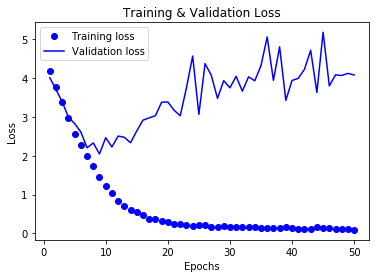

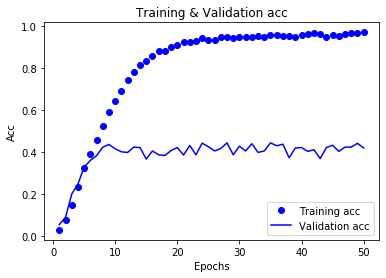

In [7]:
#######################Train 2nd Model#############################

# fit model
history = model2.fit_generator(train_it,  steps_per_epoch=int(10416/batch_size), validation_data=val_it, validation_steps=4,epochs = 50
                             ,verbose=1)


plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [8]:
# evaluate 2nd model
test_loss , test_acc = model2.evaluate_generator(test_it, steps=3)
print('Test loss: {} Test Acc: {}'.format(test_loss, test_acc))

pred=model2.predict_generator(test_it,steps=3,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1) #Capture predicted class indices

print(predicted_class_indices)

#labels = test_it.class_indices.keys()
#precisions, recall, f1_score, _ = precision_recall_fscore_support(test_trues, predicted_class_indices)
precision_improved = precision_score(test_trues, predicted_class_indices, average="macro")
recall_improved = recall_score(test_trues, predicted_class_indices, average="macro")
print("Precision:{} , recall:{},f1 score:{}".format(precision_score(test_trues, predicted_class_indices, average="macro"), recall_score(test_trues, predicted_class_indices, average="macro"), f1_score(test_trues, predicted_class_indices, average="macro")))

Test loss: 4.253202438354492 Test Acc: 0.4356164336204529
3/3 [==============================] - ETA:  - ETA:  - 1s 463ms/step
[31 39 55 19 33 69 59  1 24 33  9 32 65 31 35 10 66  5 70  0 38 40 52 62
 29 64 35 67 25 41 12 54 32  9 25 52 67  8  3 64 33 19 47 60 53  4 12 45
  9 65  5 56 19 16 57 65 46 53  3 28 56 65 69 68 47 51 62 70 47  7  4 42
  4 26 17  5 53 30 70 26 54  9  5 44 30 62  4 42 58 14 22 60 16 31 59 26
 45 53 43 68 70 37 26 45 16  0 15 64 36 20 68  2 15 46 17 19 49 53 46 57
 54 34 33 28 35 26 33 44 21 44 16 11  8 69 40 66 19  7 20 15 32 22 15 34
 33 42 65 34 39 67  5 60  5 41  0 48 37 12  8 56 19 68 64 38 59 56 19 44
 67 46  4 54 68 33 26 61 13 20 68 29 19 10 30  6 12 69 58 37 31 43 42 29
 66 11 67 53 69  6 35 47 55 51  0 19 37 26  9 53 23 39  8 29 47 19 14 23
  4 31 46  8 69 19  0 16 15 19 14 35 43 56 17 24 51 38 27 46 26 69 45 58
 63 37 47 45 31 24 25 52 71 38 23 17 49 56 15 35 10 60 12 13 20 15 35 48
 26 13 17 21 66 24 55 17 17  8 59 47 51 35 51 42 33 57  3 61  8 22 36 

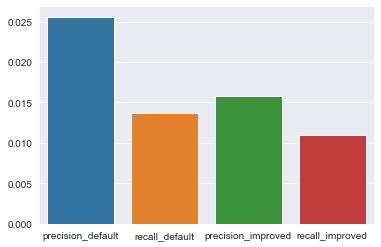

In [9]:
#############################Draw bar Chart####################################

sn.set_style('darkgrid')

x = ['precision_default', 'recall_default', 'precision_improved','recall_improved']
y = [precision_default, recall_default, precision_improved, recall_improved]

sn.barplot(x, y)
plt.show()

In [10]:
################## Here the accuracy of the improved model is higherbut the precision and recall are lesser , more training
################## needs to be done to come to any conclusion but going by the accuracy stats , the 2nd model is better
################## The validation loss also increases after a few epochs which proves that we need more samples / or 
################## images to train the model

In [11]:
#############################################################################################
#                                    Overall Run time                                       #
#############################################################################################

endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 15 Aug 2021 06:44:06 +0000
Run ended at :  Sun, 15 Aug 2021 08:43:12 +0000
